**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## DATA PREPARATION & VISUALIZATION 

In [3]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [4]:
train = pd.read_csv("train.csv")
train = train.sample(frac=0.1, replace=None, random_state=None)
test = pd.read_csv("test.csv")
test= test.sample(frac=0.1, replace=None, random_state=None)
#reading csv with pandas


### a)  Split your data into X and y:

In [5]:
train_x_a = train.drop(["label"], axis=1)
train_y = train.pop("label").to_frame()
test_x =  test.drop(["label"], axis=1)
test_y = test.pop("label").to_frame()

train_x_a = train_x_a.iloc[:,1:]
test_x = test.iloc[:,1:]

#droping target label from train data





### b)  Visualizing the data:

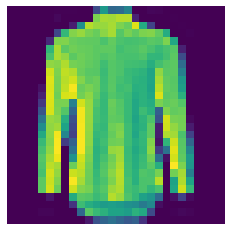

In [6]:
def plot_image(row):
    
    image = row.values.reshape(28, 28)
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
plot_image(train_x_a.iloc[0][:])

#testing with first row
# row contains pixels 28*28 == 784


### c) Class visualization:

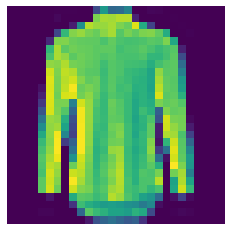

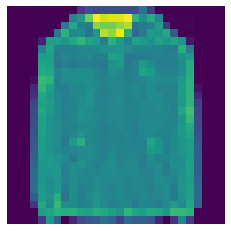

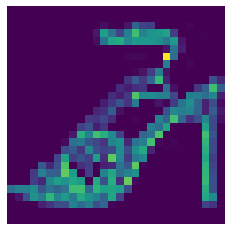

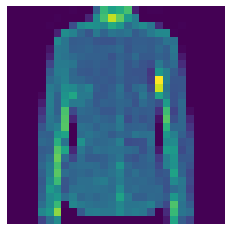

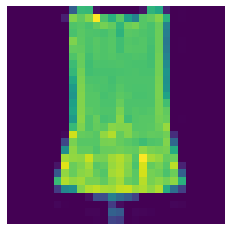

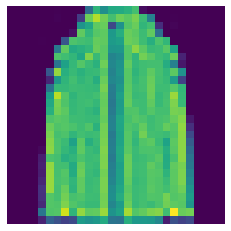

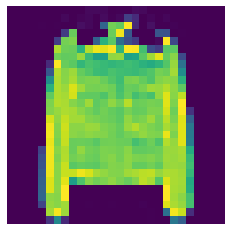

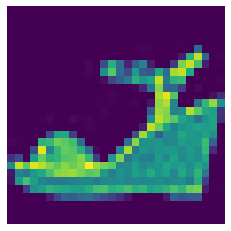

In [7]:
labels = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
#i will check values to plot_image , if values of a label is less 3 , then i will plot it 
#i will increment value of a label everytime i plot image
list_c = train_y["label"].values
i=0
real_index=0
for index, row in train_x_a.iterrows():
    
    if(labels[list_c[real_index]] <3):
        
        plot_image(row)
        labels[list_c[real_index]] +=1
        real_index+=1
        
 

   

### d) Average visualization:

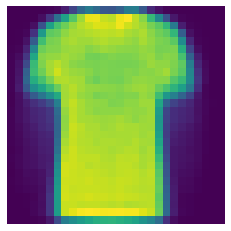

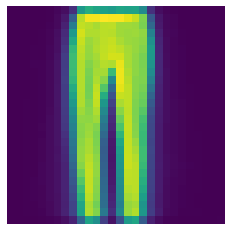

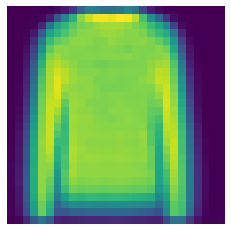

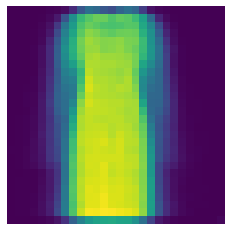

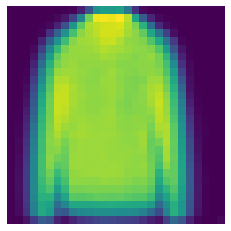

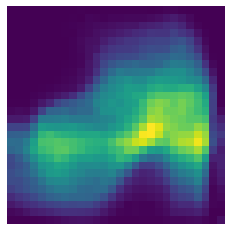

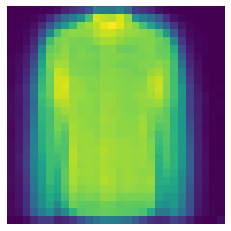

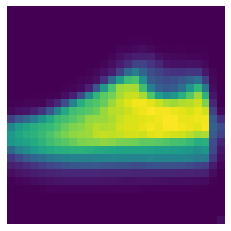

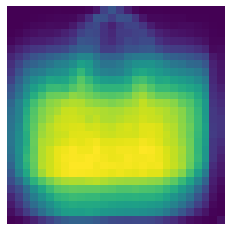

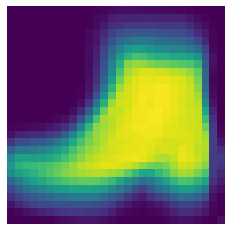

In [8]:
# for i in classes:
    # find mean image
    # plot it 
df = pd.DataFrame() 
df = train_x_a
df['label'] = train_y['label']
#df contains label and all pixels
#i go through in frame and find every row that has same label and mean their values and then call plot_image
for i in range(10):
    average = df.loc[df['label'] == i].mean(axis = 0)[1:] # for each class having their mean
    plot_image(average)

## BINARY CLASSIFICATION

### e) Binary transformation:

In [9]:
from sklearn.linear_model import LogisticRegression


In [10]:
train_x_a = train_x_a.drop(["label"], axis=1)
train_x_a

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
5905,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
29120,0,0,0,1,2,0,0,0,0,42,...,67,27,0,39,115,46,0,0,0,0
20344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19163,0,0,0,0,0,0,0,0,2,0,...,0,0,18,149,74,54,0,0,0,0
29144,0,0,0,0,0,0,0,0,76,172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26073,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7962,0,0,0,0,0,0,7,41,52,130,...,29,5,1,0,0,1,0,0,0,0
11422,0,0,0,0,0,0,0,0,0,0,...,253,238,229,209,198,143,25,0,0,0
4348,0,0,0,0,0,0,0,0,0,22,...,52,0,116,28,0,0,0,0,0,0


In [11]:
#0 = ["Sandal, Sneaker, Bag, or Ankle boot"] 
#5 7 8 9


In [12]:
train_y_e = train_y.replace([0,1,2,3,4,6],1)
train_y_e = train_y_e.replace([5,7,8,9], 0)  
#replacing 0-1-3-4-6 with 1  and 5-7-8-9 with 0 , there is a logic to start with replacing 1 , try to avoid mixing 0and1 


In [13]:
test_y_e = test_y.replace([0,1,2,3,4,6],1) 
test_y_e = test_y_e.replace([5,7,8,9], 0)  

### f) Binary Classification Model

In [14]:
# create model, train it and perofrm 5 fold cross validation.
# print mean accuracy
    
from sklearn.model_selection import cross_val_score

logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')
#my logistic regression model

accuracy = cross_val_score(logistic_regression,train_x_a,train_y_e,cv=5,scoring="accuracy")
#calculation of cross validation 
print (accuracy)
print (accuracy.mean())




c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conver

[0.99168053 0.98166667 0.985      0.98666667 0.98497496]
0.985997764808606


c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### g) Predict test data:

In [15]:
# train the model
# plot confusion matrix
# print(accuracy, precision, recall, f1_score)

logistic_regression_fitting = logistic_regression.fit(train_x_a,train_y_e)
#training my model

logistic_regression_predic = logistic_regression.predict(test_x)
#testing it

logistic_regression_predic



c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

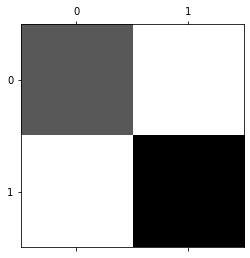

Con_Mat: [[196   2]
 [  3 299]]


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#creating confusion matrix and plotting it
confusionMatrix=confusion_matrix(test_y_e, logistic_regression_predic)
plt.matshow(confusionMatrix, cmap='binary') 
plt.show()
print('Con_Mat:', confusionMatrix)

In [17]:
precisionScore = precision_score(test_y_e, logistic_regression_predic)
recallScore = recall_score(test_y_e, logistic_regression_predic)        
f1Score = f1_score(test_y_e, logistic_regression_predic)
accuracyScore = accuracy_score(test_y_e, logistic_regression_predic)

print ("accuracy:" ,accuracyScore, "\nprecision: ",precisionScore,"\nrecal: ",recallScore,"\nf1:",f1Score)

accuracy: 0.99 
precision:  0.9933554817275747 
recal:  0.9900662251655629 
f1: 0.9917081260364842


### h) Model evaluation:


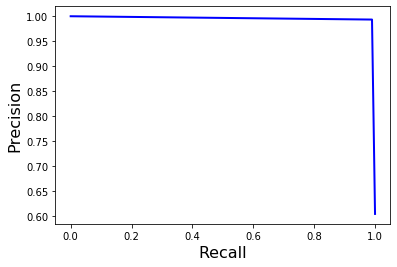

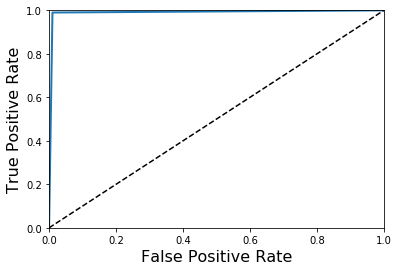

<Figure size 576x432 with 0 Axes>

Roc auc score:  0.9899826075322764


In [18]:
# plot precision-recall curve
# plot ROC curve
# print AUC score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score



precisions, recalls, thresholds = precision_recall_curve(test_y_e, logistic_regression_predic)
#code from our book

plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.show()

fpr, tpr, thresholds = roc_curve(test_y_e, logistic_regression_predic)
#calculating true false positive rate and thresholds

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plt.show()


roc_auc_Score = roc_auc_score(test_y_e, logistic_regression_predic)
print("Roc auc score: " ,roc_auc_Score)


### i) Learning curves:

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: Convergence

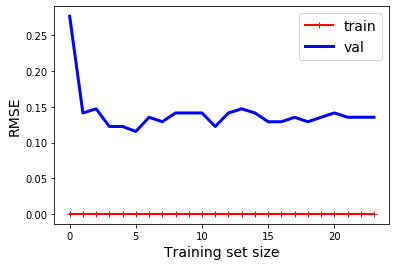

In [19]:
# plot learning curve

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(10, len(X_train), 100):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14) 

plot_learning_curves(logistic_regression, train_x_a ,train_y_e["label"])

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

### j) Training and cross validating logistic regression:

In [20]:
# 3 fold Cross Validation on train_x_a and train_y

log_reg3 = LogisticRegression(solver='lbfgs')
accuracyScore = cross_val_score(log_reg3,train_x_a,train_y,cv=3) 
print (accuracyScore)
print (accuracyScore.mean())

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\s

[0.75274177 0.74574575 0.76052104]
0.7530028541686287


c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### k) testing logistic regression:

In [21]:
# fit model 
# test model
# print confusion matrix

#fitting model
log_reg3_fit= log_reg3.fit(train_x_a,train_y)
log_reg3_prediction = log_reg3_fit.predict(test_x)
accuracyTest = accuracy_score(test_y,log_reg3_prediction)
print('Accuracy:',accuracyTest)

confusionMatrix = confusion_matrix(test_y,log_reg3_prediction)
#creating confusion matrix


print ('Confusion Matrix: \n',confusionMatrix) 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\s

Accuracy: 0.782
Confusion Matrix: 
 [[43  0  1  3  0  0  7  0  0  0]
 [ 1 48  0  5  1  0  1  0  0  0]
 [ 1  0 22  1  4  0  8  0  1  0]
 [ 1  0  1 32  3  0  4  0  1  0]
 [ 0  1  6  4 37  0  8  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  2]
 [ 5  1 10  1 11  0 28  0  1  0]
 [ 0  0  0  0  0  5  0 47  0  3]
 [ 0  0  0  0  1  1  1  0 50  0]
 [ 0  0  0  0  0  1  0  3  0 49]]


c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## MULTICLASS CLASSIFICATION USING SVR

### l) Grid search to find best model:

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


params = {"kernel": ["linear", "rbf", "poly"],  
          "C": [0.1, 0.5, 1, 5, 10], 
          "tol": [0.001, 0.1], 
          "decision_function_shape":["ovo", "ovr"]}  
svc_model = SVC()    
# creating my model 
gridSearch = GridSearchCV(svc_model, params, cv=5)  
# grid search with model and a list of params
gridSearch_fit = gridSearch.fit(train_x_a, train_y)
print(gridSearch_fit.best_params_)

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was pass

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was pass

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was pass

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change fro

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataCon

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

{'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'poly', 'tol': 0.1}


### m)Testing the best model:

In [25]:
# try to create model with best paramameters and and test it

test_model = SVC(C=0.1, decision_function_shape='ovo', kernel='poly', tol=0.1)
test_model.fit(train_x_a, train_y["label"])

c:\users\semih\pycharmprojects\untitled\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.1, verbose=False)

## MULTICLASS CLASSIFICATION USING DECISION TREES

### n) Grid Search to find best model:

In [26]:
from sklearn.tree import DecisionTreeClassifier

treeParameters = {"max_depth":[2,4,10], "min_samples_split":[2,3,4]}
# decision tree model params

decisionTreeClassifier = DecisionTreeClassifier()  # model init
treeGrid = GridSearchCV(decisionTreeClassifier, treeParameters, cv=5) 

treeGrid.fit(train_x_a, train_y["label"])  # fit the model to the training data

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 10],
                         'min_samples_split': [2, 3, 4]},
             pre_dispatch='2

In [28]:
# The best params
treeGrid.best_params_

{'max_depth': 10, 'min_samples_split': 2}

### o) Testing the best model:

In [29]:
# calculate test accuracy
# print confusion matrix

testModel2 = DecisionTreeClassifier(max_depth=10, min_samples_split=2)
testModel2.fit(train_x_a, train_y["label"])

#testing
testPrediction = testModel2.predict(test_x)
accuracy = accuracy_score(test_y, testPrediction)
print("Accuracy: " , accuracy )


Accuracy:  0.692
